In [3]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import preprocessing, decomposition

In [4]:
%%time
dati = np.load("Dataset/dati.npy")
dati.shape

CPU times: total: 234 ms
Wall time: 1.96 s


(1000000, 29)

In [5]:
X = dati[:,1:]
y = dati[:,0]

In [6]:
lstFeatures = (
"lepton_pT",
"lepton_eta",
"lepton_phi",
"missing_energy_magnitude",
"missing_energy_phi",
"jet_1_pt",
"jet_1_eta",
"jet_1_phi",
"jet_1_b-tag",
"jet_2_ptv",
"jet_2_eta",
"jet_2_phi",
"jet_2_b-tag",
"jet_3_pt",
"jet_3_eta",
"jet_3_phi",
"jet_3_b-tag",
"jet_4_pt",
"jet_4_eta",
"jet_4_phi",
"jet_4_b-tag",
"m_jj",
"m_jjj",
"m_lv",
"m_jlv",
"m_bb",
"m_wbb",
"m_wwbb",
)

# Alcune grandezze statistiche delle features

Studio di seguito alcune grandezze statistiche associate a ciascuna feature

Usare la seguente cella per generare l'output da pastare nella successiva cella di markdown per avere una tabella

In [5]:
print(f"Feature | Min | Max | Range | Mean | Std | Unique Val")
print(f"--- | --- | --- | --- | --- | --- | ---")

for i in range(X.shape[1]):
    
    tmpFeature = X[:,i]
    
    print(f"{lstFeatures[i]}\t| {tmpFeature.min():.2f}\t| {tmpFeature.max():.2f}\t| {tmpFeature.max() - tmpFeature.min():.2f}\t| {tmpFeature.mean():.2f}\t| {tmpFeature.std():.2f}\t| {len(np.unique(tmpFeature))} ")

Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
lepton_pT	| 0.27	| 9.75	| 9.47	| 0.99	| 0.57	| 19815 
lepton_eta	| -2.43	| 2.43	| 4.87	| 0.00	| 1.01	| 5001 
lepton_phi	| -1.74	| 1.74	| 3.49	| -0.00	| 1.01	| 6284 
missing_energy_magnitude	| 0.00	| 9.90	| 9.90	| 1.00	| 0.60	| 616259 
missing_energy_phi	| -1.74	| 1.74	| 3.49	| -0.00	| 1.01	| 637068 
jet_1_pt	| 0.14	| 8.38	| 8.24	| 0.99	| 0.47	| 34131 
jet_1_eta	| -2.97	| 2.97	| 5.94	| -0.00	| 1.01	| 5999 
jet_1_phi	| -1.74	| 1.74	| 3.48	| -0.00	| 1.01	| 6284 
jet_1_b-tag	| 0.00	| 2.17	| 2.17	| 1.00	| 1.03	| 3 
jet_2_ptv	| 0.19	| 11.65	| 11.46	| 0.99	| 0.50	| 26960 
jet_2_eta	| -2.91	| 2.91	| 5.83	| 0.00	| 1.01	| 5999 
jet_2_phi	| -1.74	| 1.74	| 3.49	| -0.00	| 1.01	| 6284 
jet_2_b-tag	| 0.00	| 2.21	| 2.21	| 1.00	| 1.05	| 3 
jet_3_pt	| 0.26	| 14.71	| 14.45	| 0.99	| 0.49	| 18733 
jet_3_eta	| -2.73	| 2.73	| 5.46	| -0.00	| 1.01	| 5999 
jet_3_phi	| -1.74	| 1.74	| 3.48	| 0.00	| 1.01	| 6284 
jet_3_b-t

Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
lepton_pT	| 0.27	| 9.75	| 9.47	| 0.99	| 0.57	| 19815 
lepton_eta	| -2.43	| 2.43	| 4.87	| 0.00	| 1.01	| 5001 
lepton_phi	| -1.74	| 1.74	| 3.49	| -0.00	| 1.01	| 6284 
missing_energy_magnitude	| 0.00	| 9.90	| 9.90	| 1.00	| 0.60	| 616259 
missing_energy_phi	| -1.74	| 1.74	| 3.49	| -0.00	| 1.01	| 637068 
jet_1_pt	| 0.14	| 8.38	| 8.24	| 0.99	| 0.47	| 34131 
jet_1_eta	| -2.97	| 2.97	| 5.94	| -0.00	| 1.01	| 5999 
jet_1_phi	| -1.74	| 1.74	| 3.48	| -0.00	| 1.01	| 6284 
jet_1_b-tag	| 0.00	| 2.17	| 2.17	| 1.00	| 1.03	| 3 
jet_2_pt	| 0.19	| 11.65	| 11.46	| 0.99	| 0.50	| 26960 
jet_2_eta	| -2.91	| 2.91	| 5.83	| 0.00	| 1.01	| 5999 
jet_2_phi	| -1.74	| 1.74	| 3.49	| -0.00	| 1.01	| 6284 
jet_2_b-tag	| 0.00	| 2.21	| 2.21	| 1.00	| 1.05	| 3 
jet_3_pt	| 0.26	| 14.71	| 14.45	| 0.99	| 0.49	| 18733 
jet_3_eta	| -2.73	| 2.73	| 5.46	| -0.00	| 1.01	| 5999 
jet_3_phi	| -1.74	| 1.74	| 3.48	| 0.00	| 1.01	| 6284 
jet_3_b-tag	| 0.00	| 2.55	| 2.55	| 1.00	| 1.19	| 3 
jet_4_pt	| 0.37	| 10.32	| 9.96	| 0.99	| 0.51	| 14035 
jet_4_eta	| -2.50	| 2.50	| 5.00	| 0.00	| 1.01	| 5999 
jet_4_phi	| -1.74	| 1.74	| 3.49	| 0.00	| 1.01	| 6284 
jet_4_b-tag	| 0.00	| 3.10	| 3.10	| 1.00	| 1.40	| 3 
m_jj	| 0.09	| 40.19	| 40.10	| 1.03	| 0.68	| 502300 
m_jjj	| 0.26	| 20.37	| 20.11	| 1.02	| 0.38	| 213126 
m_lv	| 0.15	| 7.99	| 7.85	| 1.05	| 0.16	| 185039 
m_jlv	| 0.13	| 11.91	| 11.77	| 1.01	| 0.40	| 260395 
m_bb	| 0.05	| 12.63	| 12.58	| 0.97	| 0.53	| 455299 
m_wbb	| 0.30	| 11.50	| 11.20	| 1.03	| 0.36	| 352577 
m_wwbb	| 0.36	| 8.37	| 8.01	| 0.96	| 0.31	| 406261 

# Scaling

Dalla tabella precedente notiamo che abbiamo grandezze che variano su scale differenti. Pertanto è necessario procedere con una normalizzazione

In [43]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled_minmax = scaler.transform(X)

scaler = preprocessing.MaxAbsScaler()
scaler.fit(X)
X_scaled_maxabs = scaler.transform(X)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_normal = scaler.transform(X)

scaler = preprocessing.RobustScaler()
scaler.fit(X)
X_scaled_robust = scaler.transform(X)

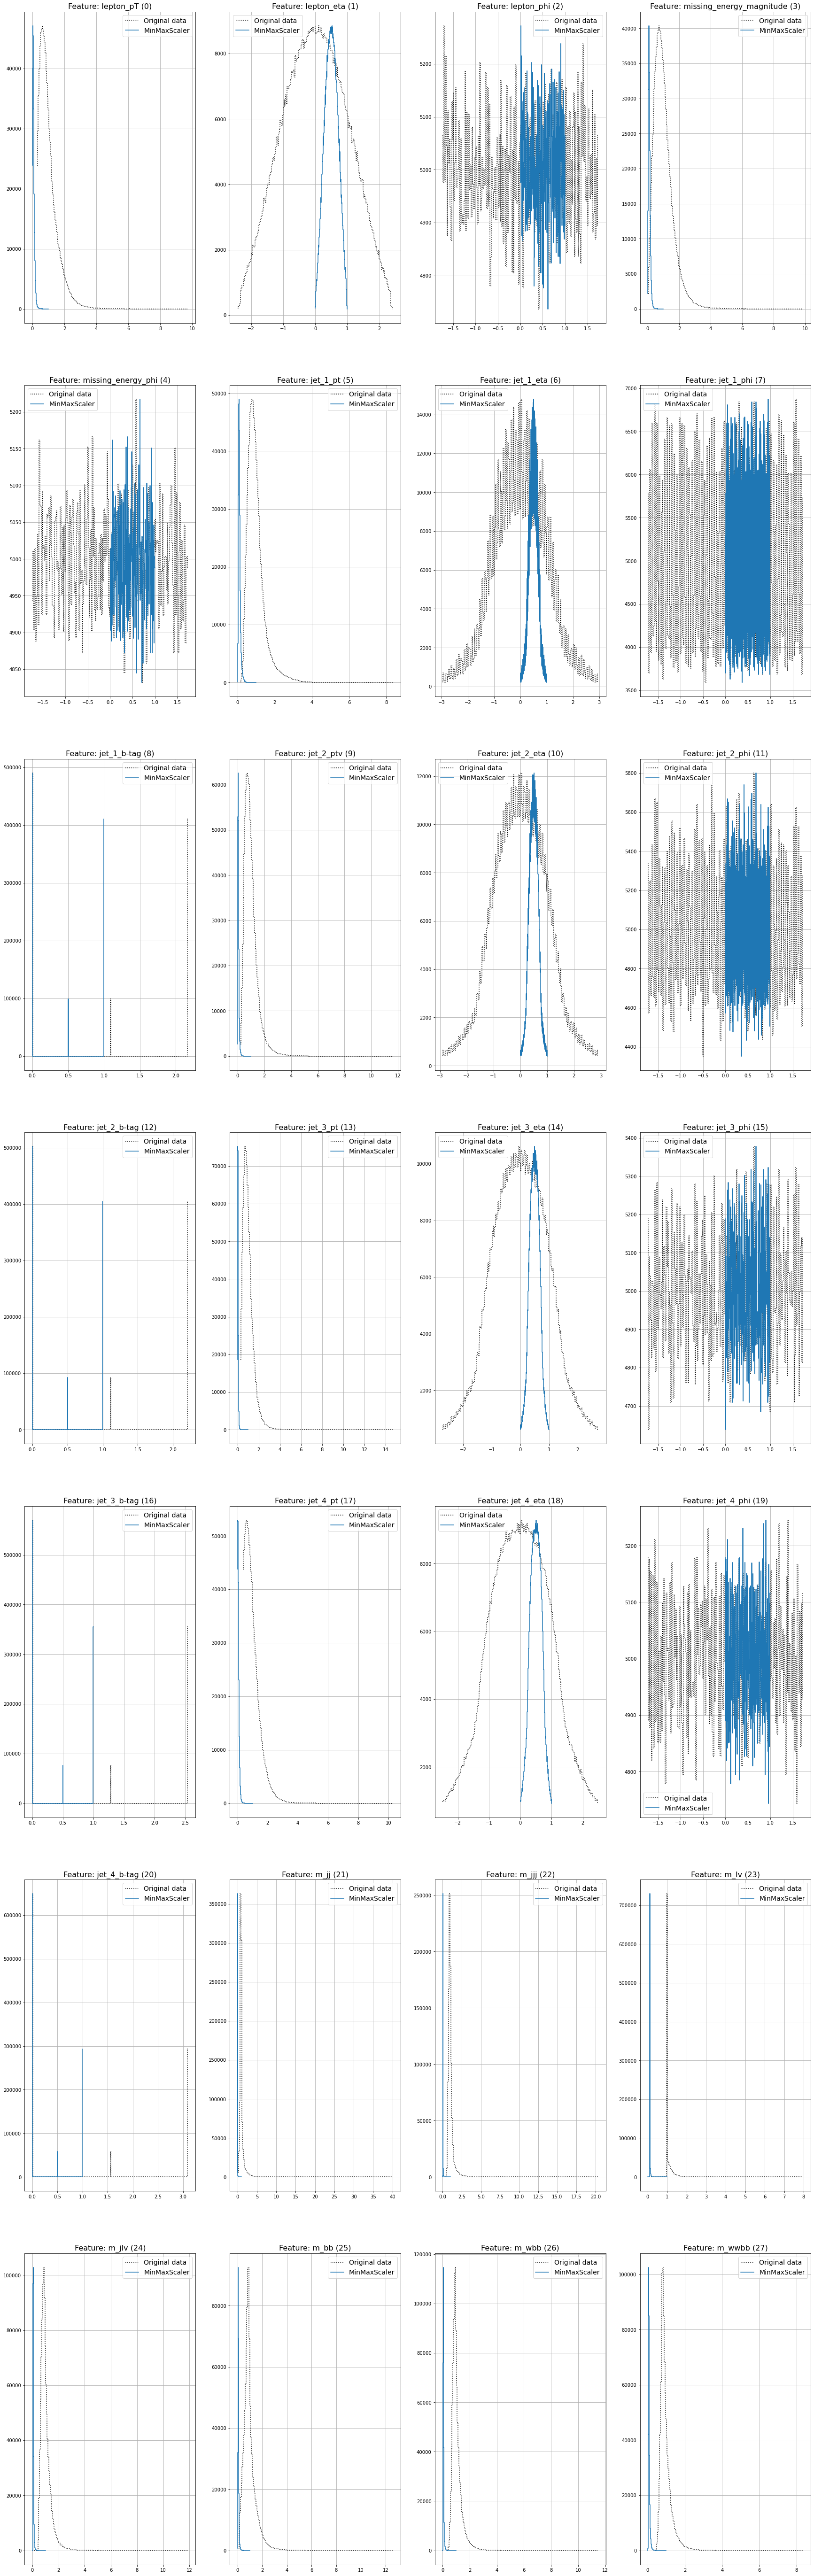

CPU times: total: 6.61 s
Wall time: 6.97 s


In [44]:
%%time

nBins = 200

fig, ax = plt.subplots(7, 4)
fig.set_size_inches(30, 100)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X[:,i], bins = nBins)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h, ds = "steps-mid", label = "Original data", c = "k", ls = ":")
    
    h, bins = np.histogram(X_scaled_minmax[:,i], bins = nBins)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h, ds = "steps-mid", label = "MinMaxScaler", )#c = "tab:green")
    
#     h, bins = np.histogram(X_scaled_maxabs[:,i], bins = nBins)
#     binc = bins[:-1] + (bins[1] - bins[0])/2
#     ax[i].plot(binc, h, ds = "steps-mid", label = "MaxAbsScaler", )#c = "tab:green")
    
#     h, bins = np.histogram(X_scaled_normal[:,i], bins = nBins)
#     binc = bins[:-1] + (bins[1] - bins[0])/2
#     ax[i].plot(binc, h, ds = "steps-mid", label = "StandardScaler", )#c = "tab:green")
    
#     h, bins = np.histogram(X_scaled_robust[:,i], bins = nBins)
#     binc = bins[:-1] + (bins[1] - bins[0])/2
#     ax[i].plot(binc, h, ds = "steps-mid", label = "RobustScaler", )#c = "tab:green")
    

    
    
    ax[i].grid()
    ax[i].set_title(f"Feature: {lstFeatures[i]} ({i})", fontsize = 16)
    
    ax[i].legend(fontsize = 14)
    
plt.show()

Esamino la stessa tabella di prima per il caso `MinMax` e `standard`. Il primo ha il vantaggio di riscalare tutte le features nell'intervallo \[0, 1\], mentre il secondo di porre media=0 e std=1

In [11]:
print(f"Feature | Min | Max | Range | Mean | Std | Unique Val")
print(f"--- | --- | --- | --- | --- | --- | ---")

for i in range(X.shape[1]):
    
    tmpFeature = X_scaled_minmax[:,i]
    
    print(f"{lstFeatures[i]}\t| {tmpFeature.min():.2f}\t| {tmpFeature.max():.2f}\t| {tmpFeature.max() - tmpFeature.min():.2f}\t| {tmpFeature.mean():.2f}\t| {tmpFeature.std():.2f}\t| {len(np.unique(tmpFeature))} ")

Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
lepton_pT	| 0.00	| 1.00	| 1.00	| 0.08	| 0.06	| 19815 
lepton_eta	| 0.00	| 1.00	| 1.00	| 0.50	| 0.21	| 5001 
lepton_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 6284 
missing_energy_magnitude	| 0.00	| 1.00	| 1.00	| 0.10	| 0.06	| 616259 
missing_energy_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 637068 
jet_1_pt	| 0.00	| 1.00	| 1.00	| 0.10	| 0.06	| 34131 
jet_1_eta	| 0.00	| 1.00	| 1.00	| 0.50	| 0.17	| 5999 
jet_1_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 6284 
jet_1_b-tag	| 0.00	| 1.00	| 1.00	| 0.46	| 0.47	| 3 
jet_2_ptv	| 0.00	| 1.00	| 1.00	| 0.07	| 0.04	| 26960 
jet_2_eta	| 0.00	| 1.00	| 1.00	| 0.50	| 0.17	| 5999 
jet_2_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 6284 
jet_2_b-tag	| 0.00	| 1.00	| 1.00	| 0.45	| 0.47	| 3 
jet_3_pt	| 0.00	| 1.00	| 1.00	| 0.05	| 0.03	| 18733 
jet_3_eta	| 0.00	| 1.00	| 1.00	| 0.50	| 0.18	| 5999 
jet_3_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 6284 
jet_3_b-tag	| 0.00	| 1.00	| 

Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
lepton_pT	| 0.00	| 1.00	| 1.00	| 0.08	| 0.06	| 19815 
lepton_eta	| 0.00	| 1.00	| 1.00	| 0.50	| 0.21	| 5001 
lepton_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 6284 
missing_energy_magnitude	| 0.00	| 1.00	| 1.00	| 0.10	| 0.06	| 616259 
missing_energy_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 637068 
jet_1_pt	| 0.00	| 1.00	| 1.00	| 0.10	| 0.06	| 34131 
jet_1_eta	| 0.00	| 1.00	| 1.00	| 0.50	| 0.17	| 5999 
jet_1_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 6284 
jet_1_b-tag	| 0.00	| 1.00	| 1.00	| 0.46	| 0.47	| 3 
jet_2_ptv	| 0.00	| 1.00	| 1.00	| 0.07	| 0.04	| 26960 
jet_2_eta	| 0.00	| 1.00	| 1.00	| 0.50	| 0.17	| 5999 
jet_2_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 6284 
jet_2_b-tag	| 0.00	| 1.00	| 1.00	| 0.45	| 0.47	| 3 
jet_3_pt	| 0.00	| 1.00	| 1.00	| 0.05	| 0.03	| 18733 
jet_3_eta	| 0.00	| 1.00	| 1.00	| 0.50	| 0.18	| 5999 
jet_3_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 6284 
jet_3_b-tag	| 0.00	| 1.00	| 1.00	| 0.39	| 0.47	| 3 
jet_4_pt	| 0.00	| 1.00	| 1.00	| 0.06	| 0.05	| 14035 
jet_4_eta	| 0.00	| 1.00	| 1.00	| 0.50	| 0.20	| 5999 
jet_4_phi	| 0.00	| 1.00	| 1.00	| 0.50	| 0.29	| 6284 
jet_4_b-tag	| 0.00	| 1.00	| 1.00	| 0.32	| 0.45	| 3 
m_jj	| 0.00	| 1.00	| 1.00	| 0.02	| 0.02	| 502300 
m_jjj	| 0.00	| 1.00	| 1.00	| 0.04	| 0.02	| 213126 
m_lv	| 0.00	| 1.00	| 1.00	| 0.12	| 0.02	| 185039 
m_jlv	| 0.00	| 1.00	| 1.00	| 0.07	| 0.03	| 260395 
m_bb	| 0.00	| 1.00	| 1.00	| 0.07	| 0.04	| 455299 
m_wbb	| 0.00	| 1.00	| 1.00	| 0.07	| 0.03	| 352577 
m_wwbb	| 0.00	| 1.00	| 1.00	| 0.07	| 0.04	| 406261 

In [12]:
print(f"Feature | Min | Max | Range | Mean | Std | Unique Val")
print(f"--- | --- | --- | --- | --- | --- | ---")

for i in range(X.shape[1]):
    
    tmpFeature = X_scaled_normal[:,i]
    
    print(f"{lstFeatures[i]}\t| {tmpFeature.min():.2f}\t| {tmpFeature.max():.2f}\t| {tmpFeature.max() - tmpFeature.min():.2f}\t| {tmpFeature.mean():.2f}\t| {tmpFeature.std():.2f}\t| {len(np.unique(tmpFeature))} ")

Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
lepton_pT	| -1.27	| 15.47	| 16.74	| -0.00	| 1.00	| 19815 
lepton_eta	| -2.41	| 2.41	| 4.83	| 0.00	| 1.00	| 5001 
lepton_phi	| -1.73	| 1.73	| 3.46	| 0.00	| 1.00	| 6284 
missing_energy_magnitude	| -1.66	| 14.83	| 16.49	| -0.00	| 1.00	| 616259 
missing_energy_phi	| -1.73	| 1.73	| 3.47	| -0.00	| 1.00	| 637068 
jet_1_pt	| -1.80	| 15.57	| 17.37	| 0.00	| 1.00	| 34131 
jet_1_eta	| -2.94	| 2.94	| 5.89	| -0.00	| 1.00	| 5999 
jet_1_phi	| -1.73	| 1.73	| 3.46	| -0.00	| 1.00	| 6284 
jet_1_b-tag	| -0.97	| 1.14	| 2.11	| -0.00	| 1.00	| 3 
jet_2_ptv	| -1.61	| 21.29	| 22.90	| -0.00	| 1.00	| 26960 
jet_2_eta	| -2.89	| 2.89	| 5.77	| -0.00	| 1.00	| 5999 
jet_2_phi	| -1.73	| 1.73	| 3.47	| -0.00	| 1.00	| 6284 
jet_2_b-tag	| -0.95	| 1.16	| 2.11	| 0.00	| 1.00	| 3 
jet_3_pt	| -1.49	| 28.16	| 29.66	| -0.00	| 1.00	| 18733 
jet_3_eta	| -2.70	| 2.70	| 5.41	| -0.00	| 1.00	| 5999 
jet_3_phi	| -1.73	| 1.73	| 3.46	| -0.00	| 1.0

Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
lepton_pT	| -1.27	| 15.47	| 16.74	| -0.00	| 1.00	| 19815 
lepton_eta	| -2.41	| 2.41	| 4.83	| 0.00	| 1.00	| 5001 
lepton_phi	| -1.73	| 1.73	| 3.46	| 0.00	| 1.00	| 6284 
missing_energy_magnitude	| -1.66	| 14.83	| 16.49	| -0.00	| 1.00	| 616259 
missing_energy_phi	| -1.73	| 1.73	| 3.47	| -0.00	| 1.00	| 637068 
jet_1_pt	| -1.80	| 15.57	| 17.37	| 0.00	| 1.00	| 34131 
jet_1_eta	| -2.94	| 2.94	| 5.89	| -0.00	| 1.00	| 5999 
jet_1_phi	| -1.73	| 1.73	| 3.46	| -0.00	| 1.00	| 6284 
jet_1_b-tag	| -0.97	| 1.14	| 2.11	| -0.00	| 1.00	| 3 
jet_2_ptv	| -1.61	| 21.29	| 22.90	| -0.00	| 1.00	| 26960 
jet_2_eta	| -2.89	| 2.89	| 5.77	| -0.00	| 1.00	| 5999 
jet_2_phi	| -1.73	| 1.73	| 3.47	| -0.00	| 1.00	| 6284 
jet_2_b-tag	| -0.95	| 1.16	| 2.11	| 0.00	| 1.00	| 3 
jet_3_pt	| -1.49	| 28.16	| 29.66	| -0.00	| 1.00	| 18733 
jet_3_eta	| -2.70	| 2.70	| 5.41	| -0.00	| 1.00	| 5999 
jet_3_phi	| -1.73	| 1.73	| 3.46	| -0.00	| 1.00	| 6284 
jet_3_b-tag	| -0.84	| 1.30	| 2.13	| -0.00	| 1.00	| 3 
jet_4_pt	| -1.23	| 18.47	| 19.70	| -0.00	| 1.00	| 14035 
jet_4_eta	| -2.48	| 2.48	| 4.95	| 0.00	| 1.00	| 5999 
jet_4_phi	| -1.73	| 1.73	| 3.46	| -0.00	| 1.00	| 6284 
jet_4_b-tag	| -0.71	| 1.50	| 2.22	| 0.00	| 1.00	| 3 
m_jj	| -1.40	| 57.99	| 59.38	| -0.00	| 1.00	| 502300 
m_jjj	| -2.00	| 50.87	| 52.87	| 0.00	| 1.00	| 213126 
m_lv	| -5.50	| 42.15	| 47.65	| -0.00	| 1.00	| 185039 
m_jlv	| -2.21	| 27.44	| 29.65	| -0.00	| 1.00	| 260395 
m_bb	| -1.75	| 22.18	| 23.93	| -0.00	| 1.00	| 455299 
m_wbb	| -2.02	| 28.69	| 30.71	| 0.00	| 1.00	| 352577 
m_wwbb	| -1.90	| 23.67	| 25.57	| 0.00	| 1.00	| 406261 

# Custom scaling


In [37]:
def myCustomScalingTraining(_X):
    
    outX = np.zeros_like(_X)
    
    nRow = _X.shape[0]
    nCol = _X.shape[1]
    
    myMean = np.mean(_X, axis = 0)
    myStd = np.std(_X, axis = 0)
    
    lstSoloPos = []
    
    # print(myMean.shape, myStd.shape)
    # print(myMean, myStd)
    
    for i in range(nCol):
        if np.sum(_X[:,i] >= 0) == nRow:
            #print(f"La feature {i} ha solo valori positivi")
            
            outX[:,i] = (_X[:,i] - (myMean[i]-1) ) / myStd[i]
            lstSoloPos.append(i)
        else:
            outX[:,i] = (_X[:,i] - myMean[i] ) / myStd[i]
            
    return outX, myMean, myStd, lstSoloPos


def myCustomScalingTest(_X, _mean, _std, lstPos):
    
    outX = np.zeros_like(_X)

    nRow = _X.shape[0]
    nCol = _X.shape[1]

    
    myMean = _mean
    myStd = _std
    
    for i in range(nCol):
        if i in lstPos:
            outX[:,i] = (_X[:,i] - (myMean[i]-1) ) / myStd[i]
        else:
            outX[:,i] = (_X[:,i] - myMean[i] ) / myStd[i]

    return outX


In [39]:
X_scaled_custom, myMean, myStd, lstSoloPos = myCustomScalingTraining(X)
X_scaled_customCheck = myCustomScalingTest(X,  myMean, myStd, lstSoloPos)

In [53]:
%%time

%matplotlib inline

nBins = 80

fig, ax = plt.subplots(7, 4)
fig.set_size_inches(30, 100)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X[:,i], bins = nBins)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h, ds = "steps-mid", label = "Original data", c = "k", ls = "--", zorder = 1)
    
    h, bins = np.histogram(X_scaled_custom[:,i], bins = nBins)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h, ds = "steps-mid", label = "Custom Scaler", c = "tab:green")
    
    # h, bins = np.histogram(X_scaled_customCheck[:,i], bins = nBins)
    # binc = bins[:-1] + (bins[1] - bins[0])/2
    # ax[i].plot(binc, h, ds = "steps-mid", label = "Custom Scaler", c = "tab:red")
    
    h, bins = np.histogram(X_scaled_minmax[:,i], bins = nBins)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h, ds = "steps-mid", label = "MinMaxScaler", )#c = "tab:green")
    
    h, bins = np.histogram(X_scaled_normal[:,i], bins = nBins)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h, ds = "steps-mid", label = "StandardScaler", )#c = "tab:green")
    
    

    
    
    ax[i].grid()
    ax[i].set_title(f"Feature: {lstFeatures[i]} ({i})", fontsize = 16)
    
    ax[i].legend(fontsize = 14)
    
plt.show()

CPU times: total: 8.78 s
Wall time: 8.85 s


# Principal Component Analysis
Per la PCA è consigliato usare la "Z-score normalization", ovvero la `Standard`, pertanto useremo quella. Inizio a studiare la matrice di covarianza. Ricordiamo che lo scopo della PCA è diagonalizzare la matrice di covarianza, ovvero andando a ricercare la "base naturale dei dati", quella lungo cui vengono massimizzate le dispersioni.

Ricordiamo che è fondamentale farlo sui dati riscalati. In caso contrario potremmo essere biassati dai valori assoluti delle features coinvolte. Mentre noi vogliamo capire quali features massimizzano la dispersione dei dati

In [14]:
# Scelgo i dati riscalati tra quelli di prima
#x_scaled = x_scaled_normal # 22 features
# x_scaled = x_scaled_minmax # 12 features
# x_scaled = x_scaled_maxabs # 12 features
# x_scaled = x_scaled_robust # 17 features

scaledMode = "MinMaxScaler"

if scaledMode == "MinMaxScaler":
    X_scaled = X_scaled_minmax
elif scaledMode == "MaxAbsScaler":
    X_scaled = X_scaled_maxabs
elif scaledMode == "StandardScaler":
    X_scaled = X_scaled_normal
elif scaledMode == "RobustScaler":
    X_scaled = X_scaled_robust
        
        

In [15]:
myCov = np.cov(X_scaled, rowvar = False)
myCov.shape

(28, 28)

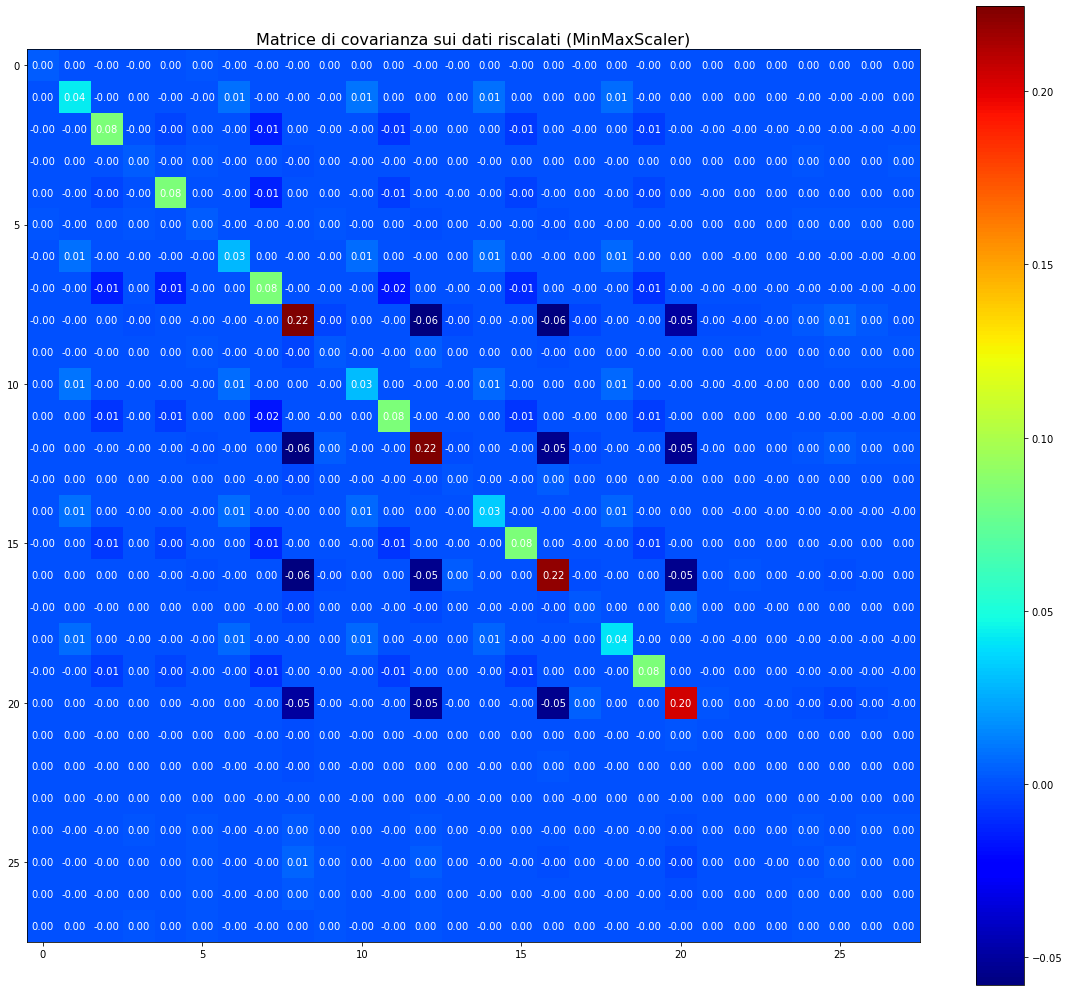

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 18)

# Plotto la matrice di covarianza
im = ax.imshow(myCov, cmap = "jet", origin = "upper")

ax.set_title(f"Matrice di covarianza sui dati riscalati ({scaledMode})", fontsize = 16)

# Stampo i valori sulle celle
for i in range(myCov.shape[0]):
    for j in range(myCov.shape[1]):
        text = ax.text(j, i, f"{myCov[i, j]:.2f}",
                       ha="center", va="center", color="w", )#weight="semibold")

# Disegno la colorbar
fig.colorbar(im)

plt.show()

In [20]:
# Applico la PCA
pca = decomposition.PCA()
pca.fit(X_scaled)
#x_pca = pca.transform(x_scaled)

# Estraggo le Explained Variances
X_ev = pca.explained_variance_ratio_
X_cumev = np.cumsum(X_ev)

"""
Prove su features e numero di componenti
Nota bene: Come osservato in fase di grid search, in base al particolare blocco
di TrS può variare, di circa una feature...
"""
print(f"Soglia 90 %: {np.sum(X_cumev < .9)} features")
print(f"Soglia 95 %: {np.sum(X_cumev < .95)} features")
print(f"Soglia 98 %: {np.sum(X_cumev < .98)} features")
print(f"Soglia 99 %: {np.sum(X_cumev < .99)} features")


Soglia 90 %: 10 features
Soglia 95 %: 12 features
Soglia 98 %: 14 features
Soglia 99 %: 15 features


### Scaling custom

In [45]:
# Applico la PCA
pca = decomposition.PCA()
pca.fit(X_scaled_custom)
#x_pca = pca.transform(x_scaled)

# Estraggo le Explained Variances
X_ev = pca.explained_variance_ratio_
X_cumev = np.cumsum(X_ev)

"""
Prove su features e numero di componenti
Nota bene: Come osservato in fase di grid search, in base al particolare blocco
di TrS può variare, di circa una feature...
"""
print(f"Soglia 90 %: {np.sum(X_cumev < .9)} features")
print(f"Soglia 95 %: {np.sum(X_cumev < .95)} features")
print(f"Soglia 98 %: {np.sum(X_cumev < .98)} features")
print(f"Soglia 99 %: {np.sum(X_cumev < .99)} features")


Soglia 90 %: 19 features
Soglia 95 %: 22 features
Soglia 98 %: 24 features
Soglia 99 %: 25 features


### Scaling MinMax

In [54]:
# Applico la PCA
pca = decomposition.PCA()
pca.fit(X_scaled_minmax)
#x_pca = pca.transform(x_scaled)

# Estraggo le Explained Variances
X_ev = pca.explained_variance_ratio_
X_cumev = np.cumsum(X_ev)

"""
Prove su features e numero di componenti
Nota bene: Come osservato in fase di grid search, in base al particolare blocco
di TrS può variare, di circa una feature...
"""
print(f"Soglia 90 %: {np.sum(X_cumev < .9)} features")
print(f"Soglia 95 %: {np.sum(X_cumev < .95)} features")
print(f"Soglia 98 %: {np.sum(X_cumev < .98)} features")
print(f"Soglia 99 %: {np.sum(X_cumev < .99)} features")


Soglia 90 %: 10 features
Soglia 95 %: 12 features
Soglia 98 %: 14 features
Soglia 99 %: 15 features


### Scaling Standard

In [55]:
# Applico la PCA
pca = decomposition.PCA()
pca.fit(X_scaled_normal)
#x_pca = pca.transform(x_scaled)

# Estraggo le Explained Variances
X_ev = pca.explained_variance_ratio_
X_cumev = np.cumsum(X_ev)

"""
Prove su features e numero di componenti
Nota bene: Come osservato in fase di grid search, in base al particolare blocco
di TrS può variare, di circa una feature...
"""
print(f"Soglia 90 %: {np.sum(X_cumev < .9)} features")
print(f"Soglia 95 %: {np.sum(X_cumev < .95)} features")
print(f"Soglia 98 %: {np.sum(X_cumev < .98)} features")
print(f"Soglia 99 %: {np.sum(X_cumev < .99)} features")


Soglia 90 %: 19 features
Soglia 95 %: 22 features
Soglia 98 %: 24 features
Soglia 99 %: 25 features


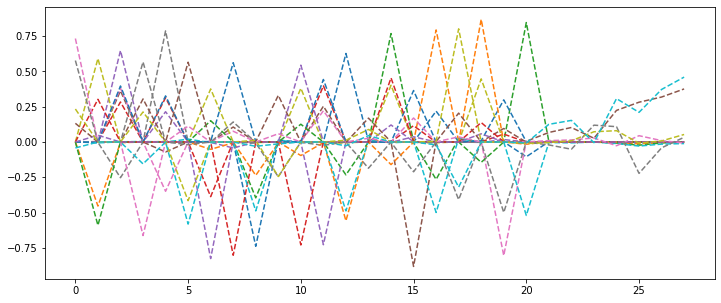

In [125]:
pca.components_.shape

# Non mi sembra che ci sia una componente che significativamente conta più di tutte..

fig, ax = plt.subplots()
fig.set_size_inches(12,5)

for i in range(20):
    ax.plot(pca.components_[i], ls = "--" )
    
plt.show()

Features < thr: 15


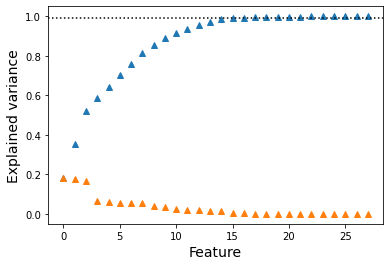

In [126]:
thr = .99

fig, ax = plt.subplots()

ax.plot(X_cumev, ds = "steps-mid", ls = "", marker = "^",)
ax.plot(X_ev, ds = "steps-mid", ls = "", marker = "^",)

ax.axhline(y = thr, ls = ":", c = "k")

ax.set_xlabel("Feature", fontsize = 14)
ax.set_ylabel("Explained variance", fontsize = 14)


print(f"Features < thr: {np.sum(x_cumev <= thr)}")



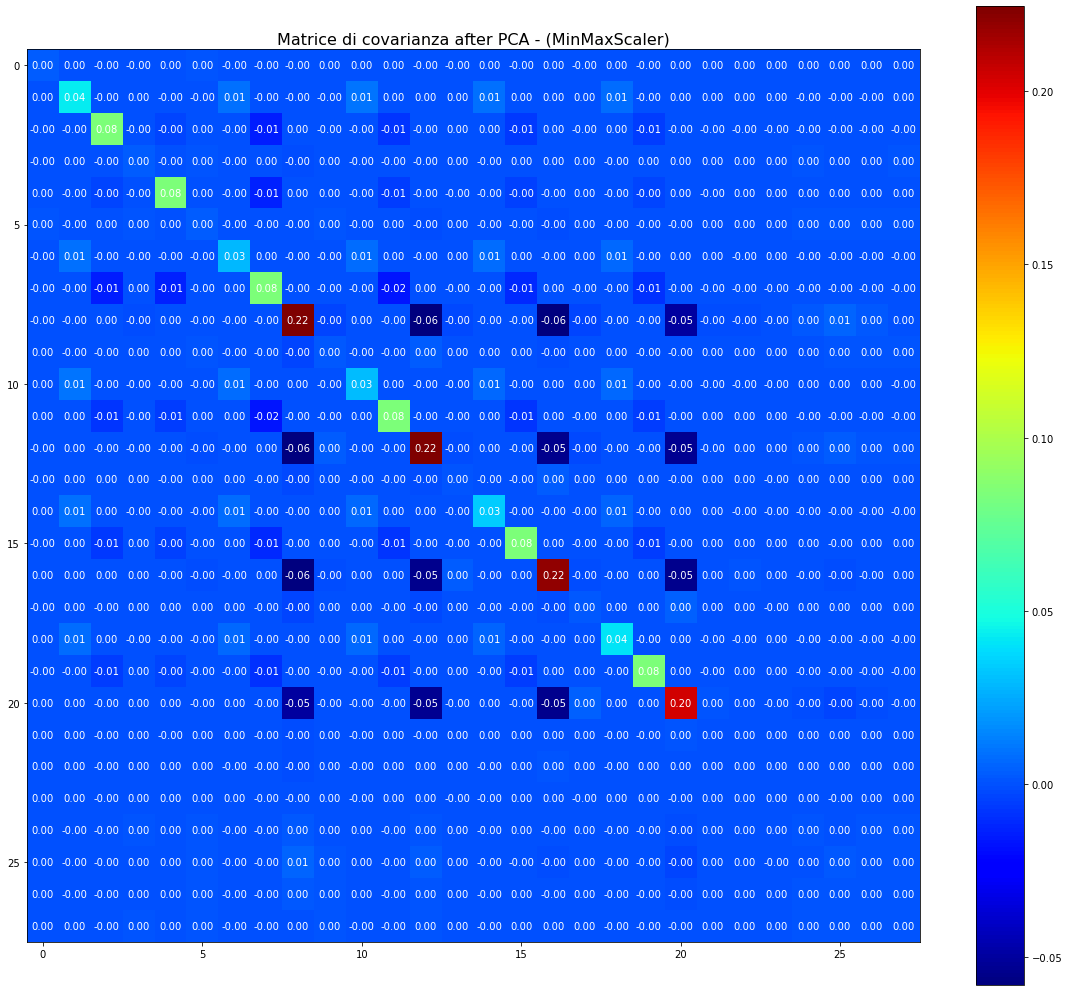

In [127]:
pcaCov = pca.get_covariance()


fig, ax = plt.subplots()
fig.set_size_inches(20, 18)

# Plotto la matrice di covarianza
im = ax.imshow(pcaCov, cmap = "jet", origin = "upper")

ax.set_title(f"Matrice di covarianza after PCA - ({scaledMode})", fontsize = 16)

# Stampo i valori sulle celle
for i in range(myCov.shape[0]):
    for j in range(myCov.shape[1]):
        text = ax.text(j, i, f"{pcaCov[i, j]:.2f}",
                       ha="center", va="center", color="w", )#weight="semibold")

# Disegno la colorbar
fig.colorbar(im)

plt.show()

# //TODO Matrice di covarianza

Costruisco la matrice di covarianza delle features per andare a cercare la presenza di eventuali correlazioni tra le features. Tuttavia per non essere dominati dalle "variazioni assolute" di una singola feature con intervallo significativamente maggiore, questa andrebbe valutata sulle grandezze riscalate

In [35]:
myCov = np.cov(x.T)
myCov.shape

(28, 28)

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 18)

# Plotto la matrice di covarianza
im = ax.imshow(myCov, cmap = "jet", origin = "upper")

ax.set_title("Matrice di covarianza sui dati riscalati (StandardScaler)", fontsize = 16)

# Stampo i valori sulle celle
for i in range(myCov.shape[0]):
    for j in range(myCov.shape[1]):
        text = ax.text(j, i, f"{myCov[i, j]:.2f}",
                       ha="center", va="center", color="w", )#weight="semibold")

# Disegno la colorbar
fig.colorbar(im)

plt.show()